# Personal Loan Campaign of AllLife Bank

## Context

AllLife Bank is a US bank which wants to convert its liability customers(depositors) to asset customers(borrowers) while retaining the liability customers. The aim of this project is to build a model using which the bank can identify potential customers to buy loan and increase their profit.

## Data Dictionary

__ID:__ Customer ID<br>
__Age:__ Custor’s age in completed years <br>
__Experience:__ no of years of professional experience <br>
__Income:__ Annual income of the customer (in thousand dollars) <br>
__ZIP Code:__ Home Address ZIP code <br>
__Family:__ the Family size of the customer <br>
__CCAvg:__ Average spending on credit cards per month (in thousand dollars) <br>
__Education:__ Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional <br>
__Mortgage:__ Value of house mortgage if any. (in thousand dollars) <br>
__Personal_Loan:__ Did this customer accept the personal loan offered in the last campaign? <br>
__Securities_Account:__ Does the customer have a securities account with the bank? <br>
__CD_Account:__ Does the customer have a certificate of deposit (CD) account with the bank? <br>
__Online:__ Do customers use internet banking facilities? <br>
__CreditCard:__ Does the customer use a credit card issued by any other Bank (excluding All life Bank)? <br>

### Import Important libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import uszipcode # Contains zipcode details which can be used to handle zipcode column
from uszipcode import SearchEngine
import warnings
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

%matplotlib inline
pd.set_option('mode.chained_assignment', None)
warnings.filterwarnings('ignore')

### Loading and exploring the data

In [3]:
search = SearchEngine() # Calling search engine to process ZIPCode values

In [4]:
df = pd.read_csv('Loan_Modelling.csv')
print("The dataset has {} rows and {} columns".format(df.shape[0],df.shape[1])) # prints the number of rows and columns of dataset

The dataset has 5000 rows and 14 columns


In [5]:
# using random to display random rows rather than only first 5 and last 5
np.random.seed(1)
df.sample(n=10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
2764  2765   31           5      84    91320       1    2.9          3   
4767  4768   35           9      45    90639       3    0.9          1   
3814  3815   34           9      35    94304       3    1.3          1   
3499  3500   49          23     114    94550       1    0.3          1   
2735  2736   36          12      70    92131       3    2.6          2   
3922  3923   31           4      20    95616       4    1.5          2   
2701  2702   50          26      55    94305       1    1.6          2   
1179  1180   36          11      98    90291       3    1.2          3   
932    933   51          27     112    94720       3    1.8          2   
792    793   41          16      98    93117       1    4.0          3   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
2764       105              0                   0           0       0   
4767       101              0                   1           0       0   
3814         0              0                   0           0       0   
3499       286              0                   0           0       1   
2735       165              0                   0           0       1   
3922         0              0                   0           0       1   
2701         0              0                   0           0       1   
1179         0              0                   1           0       0   
932          0              0                   1           1       1   
792          0              0                   0           0       0   

      CreditCard  
2764           1  
4767           0  
3814           0  
3499           0  
2735           0  
3922           0  
2701           0  
1179           1  
932            1  
792            1

In [6]:
df.info() # Function to display the shape, missing values and datatypes of columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Here we can see that there are no missing values in the dataset. All the columns are of numeric datatype so no change in datatype is required.

In [7]:
df.describe().T # function to extract statistical summary of the data

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

### Observations:
 
 - The bank has customers varying from 23 years to 67 years.<br>
 - We can see that the minimum experience is -3 years which can be a typing error as a person cannot have negative experience. This has to be corrected.<br>
 - There are few customers who have a house mortgage while 75% of the customers don't have a house mortgage.<br>
 - There are customers who do not use credit cards as the minimum value is 0. <br>
 - The customers supposedly have small families as the max number of members in family is 4.<br>

In [8]:
df.isnull().sum() # function to check for null values

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

The dataset does not have null values.

In [9]:
df.duplicated().sum() # function to check duplicate rows

0

There are no duplicate rows in the dataset.

In [10]:
data = df.copy() # Let us keep a backup of the data

#### Let us extract the county details using the zip code column and drop zip code

In [11]:
df['County'] = df['ZIPCode'].map(lambda x: search.by_zipcode(int(x)).county if search.by_zipcode(int(x)) else 'missing')

In [12]:
df['County'].value_counts()

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
missing                     34
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Siskiyou

In [13]:
df.drop('ZIPCode', inplace=True, axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  County              5000 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


## Univariate Analysis

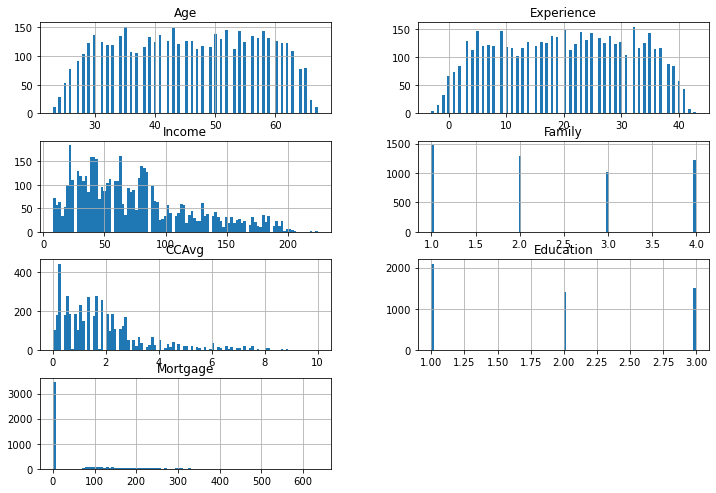

In [15]:
columns = ['Age','Experience','Income','Family','CCAvg','Education','Mortgage'] 
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

### Observations:
 
 - The above graph depicts that the Income, CCAvg and Mortgage columns are right skewed.<br>
 - Most of the customers seems to be undergraduates.<br>
 - Income and CCAvg columns might have outliers.<br>
 -  We can see that some values are negative in the experience column which does not seem to be normal. This can be a typing error. Let us convert this to positive values.<br>

In [16]:
df['Experience'] = df['Experience'].abs()

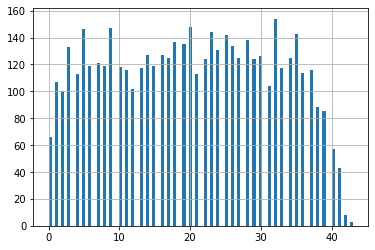

In [17]:
df['Experience'].hist(bins=100); 

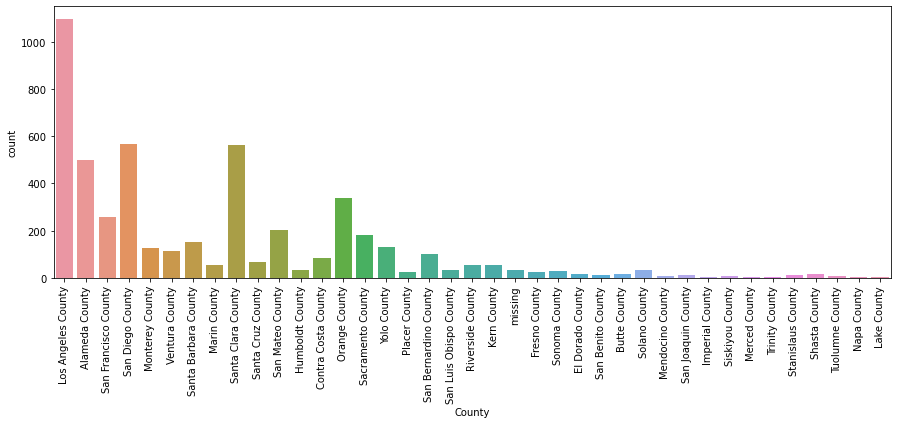

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x = 'County')
plt.xticks(rotation=90)
plt.show()

### Observations:
 
 - From the above graph we can see that the major customers are from Los Angeles.
 - There are few regions where there are very few customers.

## Bivariate Analysis

In [19]:
df.corr()

ID       Age  Experience    Income    Family  \
ID                  1.000000 -0.008473   -0.008202 -0.017695 -0.016797   
Age                -0.008473  1.000000    0.993991 -0.055269 -0.046418   
Experience         -0.008202  0.993991    1.000000 -0.046876 -0.051851   
Income             -0.017695 -0.055269   -0.046876  1.000000 -0.157501   
Family             -0.016797 -0.046418   -0.051851 -0.157501  1.000000   
CCAvg              -0.024675 -0.052012   -0.049738  0.645984 -0.109275   
Education           0.021463  0.041334    0.013919 -0.187524  0.064929   
Mortgage           -0.013920 -0.012539   -0.011097  0.206806 -0.020445   
Personal_Loan      -0.024801 -0.007726   -0.008304  0.502462  0.061367   
Securities_Account -0.016972 -0.000436   -0.000989 -0.002616  0.019994   
CD_Account         -0.006909  0.008043    0.009735  0.169738  0.014110   
Online             -0.002528  0.013702    0.014051  0.014206  0.010354   
CreditCard          0.017028  0.007681    0.008851 -0.002385  0.011588   

                       CCAvg  Education  Mortgage  Personal_Loan  \
ID                 -0.024675   0.021463 -0.013920      -0.024801   
Age                -0.052012   0.041334 -0.012539      -0.007726   
Experience         -0.049738   0.013919 -0.011097      -0.008304   
Income              0.645984  -0.187524  0.206806       0.502462   
Family             -0.109275   0.064929 -0.020445       0.061367   
CCAvg               1.000000  -0.136124  0.109905       0.366889   
Education          -0.136124   1.000000 -0.033327       0.136722   
Mortgage            0.109905  -0.033327  1.000000       0.142095   
Personal_Loan       0.366889   0.136722  0.142095       1.000000   
Securities_Account  0.015086  -0.010812 -0.005411       0.021954   
CD_Account          0.136534   0.013934  0.089311       0.316355   
Online             -0.003611  -0.015004 -0.005995       0.006278   
CreditCard         -0.006689  -0.011014 -0.007231       0.002802   

                    Securities_Account  CD_Account    Online  CreditCard  
ID                           -0.016972   -0.006909 -0.002528    0.017028  
Age                          -0.000436    0.008043  0.013702    0.007681  
Experience                   -0.000989    0.009735  0.014051    0.008851  
Income                       -0.002616    0.169738  0.014206   -0.002385  
Family                        0.019994    0.014110  0.010354    0.011588  
CCAvg                         0.015086    0.136534 -0.003611   -0.006689  
Education                    -0.010812    0.013934 -0.015004   -0.011014  
Mortgage                     -0.005411    0.089311 -0.005995   -0.007231  
Personal_Loan                 0.021954    0.316355  0.006278    0.002802  
Securities_Account            1.000000    0.317034  0.012627   -0.015028  
CD_Account                    0.317034    1.000000  0.175880    0.278644  
Online                        0.012627    0.175880  1.000000    0.004210  
CreditCard                   -0.015028    0.278644  0.004210    1.000000

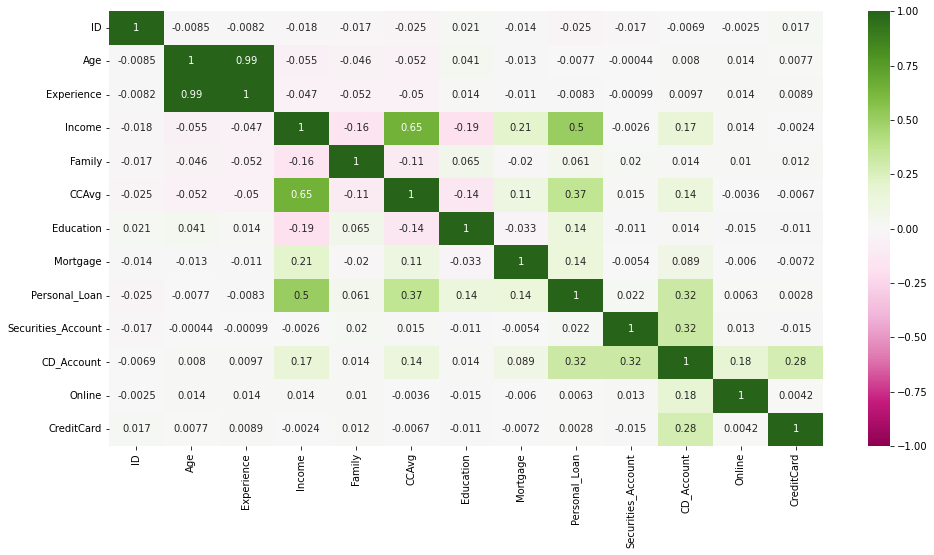

In [20]:
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap="PiYG");

### Observations:
 
 - The slots having green have the highest positive correlation. <br>
 - Age and Experience have a positive correlation. <br>
 - Personal loan, Income and CCAvg have positive correlation.<br>
 - There is very less correlation between the rest of the columns.<br>

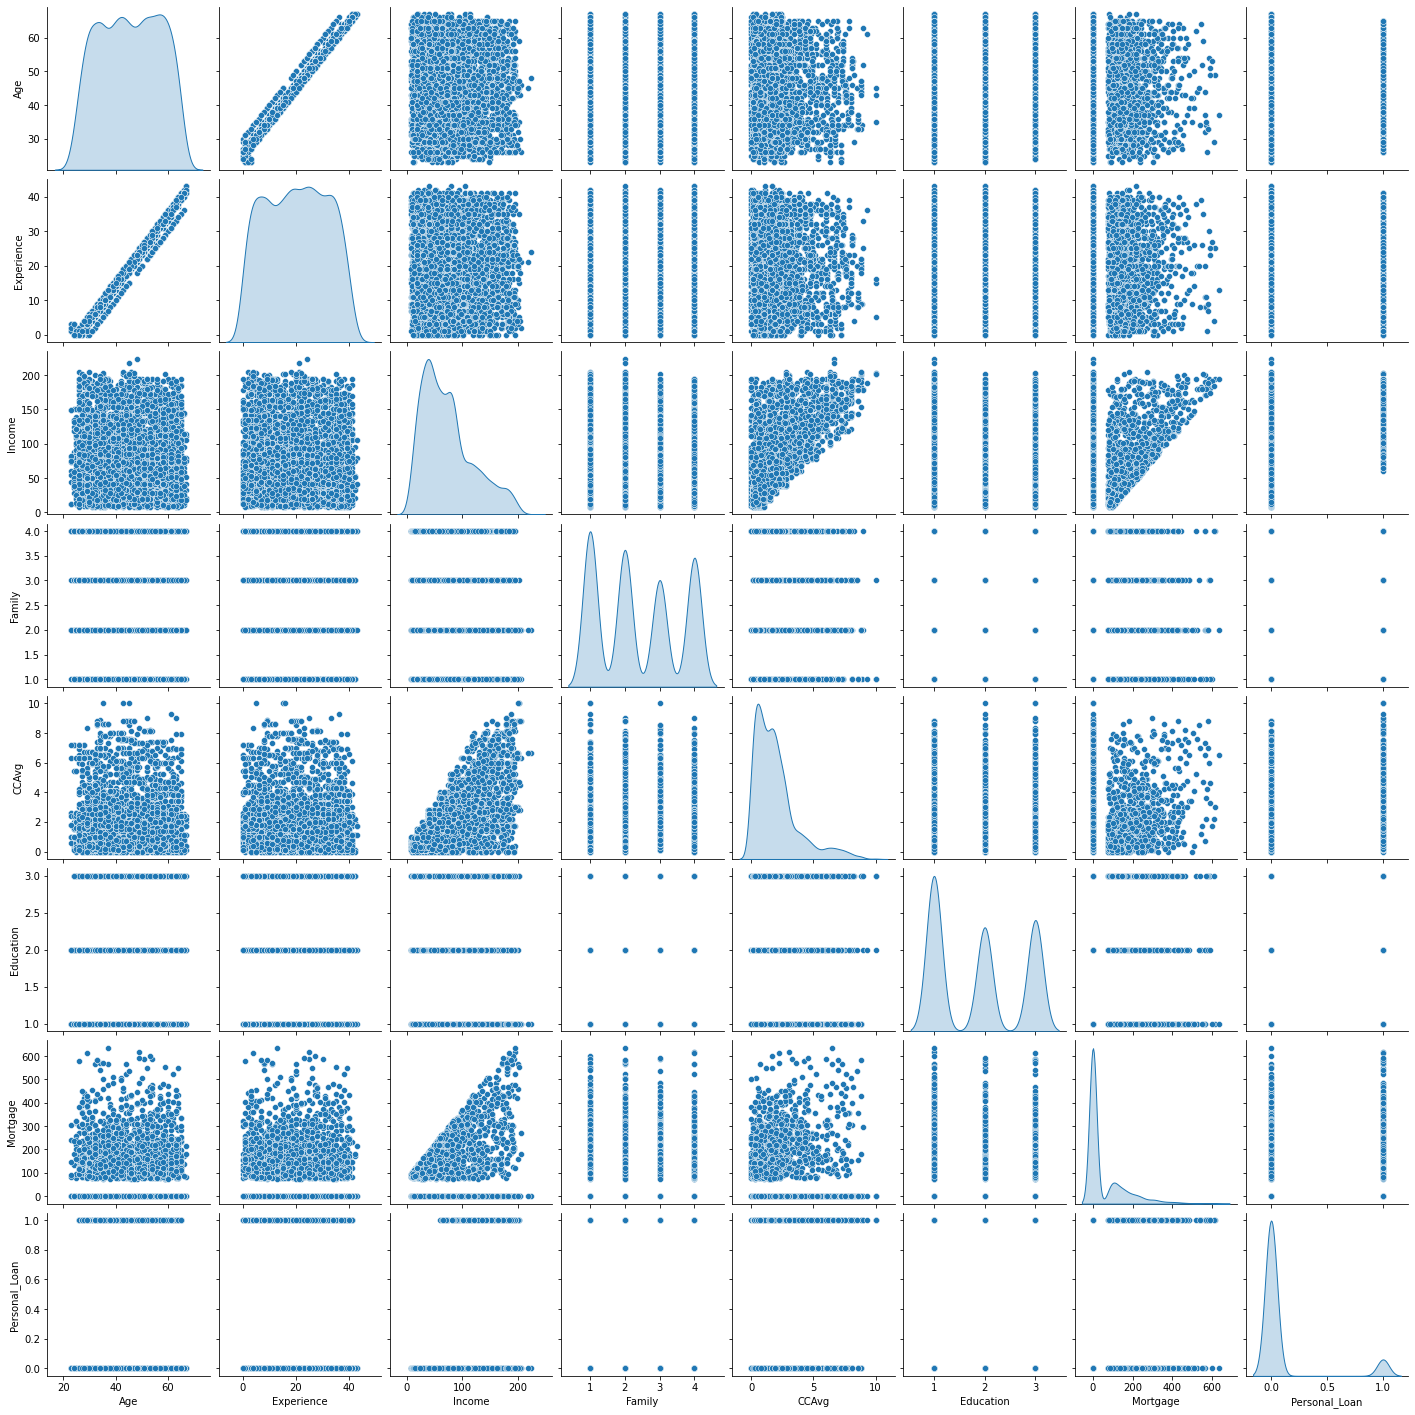

In [21]:
sns.pairplot(df,vars=['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Personal_Loan'] ,diag_kind='kde');

### Observations:
 
 - The pairplot shows that age and experience have a positive correlation. <br>
 - There is a correlation between CCAvg and Income. <br>
 - Mortgage and Income also have a positive correlation.<br>
 - For the rest of the columns seems like we cannot deduce an relationship.<br>

## Missing Value Treatment

In [22]:
df.isnull().sum() 

ID                    0
Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
County                0
dtype: int64

We can see that there are no missing values in the dataset.

## Outlier detection and treatment

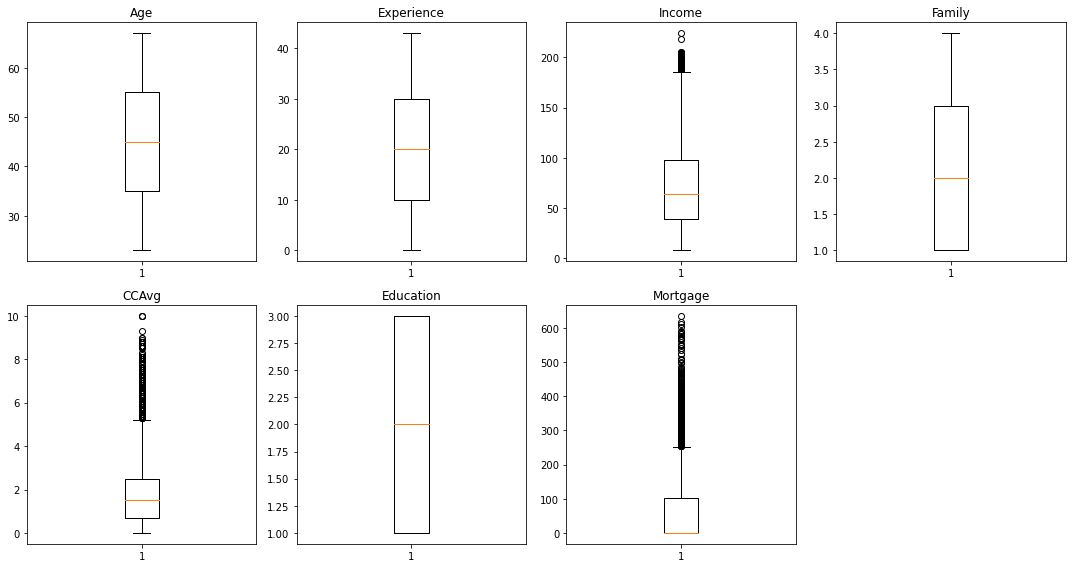

In [23]:
columns = ['Age','Experience','Income','Family','CCAvg','Education','Mortgage']  # list of numerical values in the dataset
plt.figure(figsize=(15,8)) # specify the size of each plot

for i, variable in enumerate(columns):
    plt.subplot(2,4, i + 1) # specify where to place each plot
    plt.boxplot(df[variable], whis=1.5) # create boxplot
    plt.tight_layout() # used to adjust the subplots
    plt.title(variable) # set the title to be the column name of that particular plot

plt.show()

#### Calculate outliers in each column

In [24]:
Q1 = df[columns].quantile(0.25) # first quantile -> 25% percentile
Q3 = df[columns].quantile(0.75) # second quantile -> 75% percentile

IQR = Q3 - Q1 # Inter quantile range                  

lower_whisker = Q1 - 1.5*IQR # finding the lower bound   
upper_whisker = Q3 + 1.5*IQR # finding the upper bound

# find the percentage of outliers in each column
((df[columns] < lower_whisker) | (df[columns] > upper_whisker)).sum()/df.shape[0]*100 

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Education     0.00
Mortgage      5.82
dtype: float64

### Observations:
 
 - Using the above plot we can see that income, mortgage and CCAvg have outliers.<br>
 - Income need not be treated as there will be customers who have higher income.<br>
 - Similarly, since CCAvg and Mortgage is positively correlated to income, we can conclude that the users having higher income have the chances of having higher CCAVg and Mortgage. There can be cases where the customers having lower income have higher CCAvg and Montage.<br>
 - Hence we will not be treating these columns.<br>

## Feature Engineering

### Log Transformation

The CCAvg and Mortgage columns are very skewed, let us apply log transformation on this column and check whether it reduces the skewness.

#### Log transformation of CCAvg

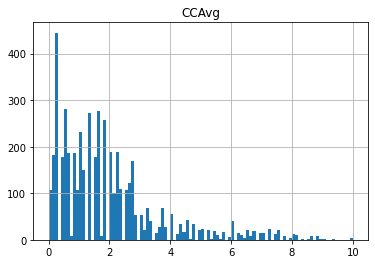

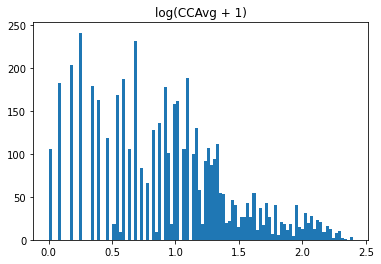

In [25]:
df['CCAvg'].hist(bins=100); 
plt.title('CCAvg')
plt.show()
plt.hist(np.log(df['CCAvg'] + 1), 100)
plt.title('log(CCAvg + 1)')
plt.show()

From the above graph we can see that the skewness has reduced. Let us store this value in a new column.

In [26]:
df["CCAvg_log"] = np.log(df["CCAvg"]+1)

In [27]:
df["CCAvg_log"].head()

0    0.955511
1    0.916291
2    0.693147
3    1.308333
4    0.693147
Name: CCAvg_log, dtype: float64

#### Log transformation of Mortage

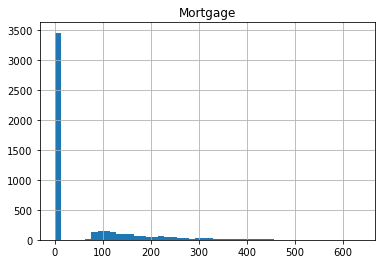

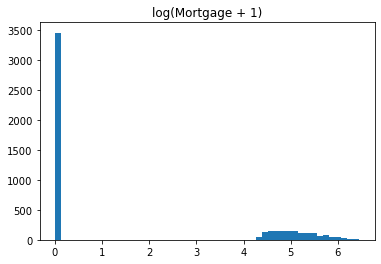

In [28]:
df['Mortgage'].hist(bins=50); 
plt.title('Mortgage')
plt.show()
plt.hist(np.log(df['Mortgage']+1), 50)
plt.title('log(Mortgage + 1)')
plt.show()

The data is still skewed after applying log transformation. There are no changes in the graph. Let us try some more options like sin transformation and sqrt transformation and check if there is any improvement in the data.

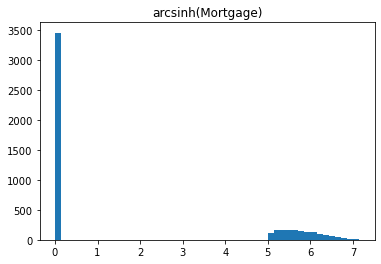

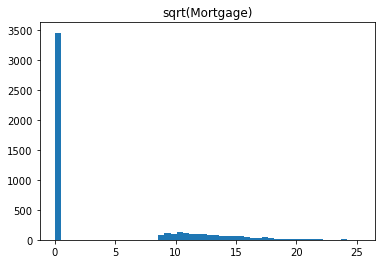

In [29]:
plt.hist(np.arcsinh(df['Mortgage']), 50)
plt.title('arcsinh(Mortgage)')
plt.show()
plt.hist(np.sqrt(df['Mortgage']), 50)
plt.title('sqrt(Mortgage)')
plt.show()

The sin transformation is similar to log transformation but sqrt seems to be more skewed. So let us keep log transformation to see if it adds any value to the model performance.

In [30]:
df["Mortgage_log"] = np.log(df["Mortgage"]+1)

In [31]:
df["Mortgage_log"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Mortgage_log, dtype: float64

### One Hot Encoding

Let us convert Family and Education into categorical types and perform one hot encoding on these columns.

In [32]:
cat_vars = ['Family', 'Education','County']

for colname in cat_vars:
    df[colname] = df[colname].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   int64   
 9   Securities_Account  5000 non-null   int64   
 10  CD_Account          5000 non-null   int64   
 11  Online              5000 non-null   int64   
 12  CreditCard          5000 non-null   int64   
 13  County              5000 non-null   category
 14  CCAvg_log           5000 non-null   float64 
 15  Mortgage_log        5000 non-null   fl

In [33]:
df = pd.get_dummies(df, columns=['Family', 'Education','County'], drop_first=True)

df.head()

ID  Age  Experience  Income  CCAvg  Mortgage  Personal_Loan  \
0   1   25           1      49    1.6         0              0   
1   2   45          19      34    1.5         0              0   
2   3   39          15      11    1.0         0              0   
3   4   35           9     100    2.7         0              0   
4   5   35           8      45    1.0         0              0   

   Securities_Account  CD_Account  Online  ...  County_Shasta County  \
0                   1           0       0  ...                     0   
1                   1           0       0  ...                     0   
2                   0           0       0  ...                     0   
3                   0           0       0  ...                     0   
4                   0           0       0  ...                     0   

   County_Siskiyou County  County_Solano County  County_Sonoma County  \
0                       0                     0                     0   
1                       0                     0                     0   
2                       0                     0                     0   
3                       0                     0                     0   
4                       0                     0                     0   

   County_Stanislaus County  County_Trinity County  County_Tuolumne County  \
0                         0                      0                       0   
1                         0                      0                       0   
2                         0                      0                       0   
3                         0                      0                       0   
4                         0                      0                       0   

   County_Ventura County  County_Yolo County  County_missing  
0                      0                   0               0  
1                      0                   0               0  
2                      0                   0               0  
3                      0                   0               0  
4                      0                   0               0  

[5 rows x 56 columns]

## Check for hidden missing values

The distribution in the training dataset and testing dataset seems to be close to the original dataset.

Earlier we have seen that there are no missing values. But there are chances that some values might be entered as 0. Let us check for those. There are few columns which require 0's. We will not be imputing them. We will be imputing only the relevant columns.

In [34]:
rep_0 = SimpleImputer(missing_values=0, strategy="median") # impute the age and zipcode columns with median
cols=['Age']

df[cols] = rep_0.fit_transform(df[cols])

df.head(10)

ID   Age  Experience  Income  CCAvg  Mortgage  Personal_Loan  \
0   1  25.0           1      49    1.6         0              0   
1   2  45.0          19      34    1.5         0              0   
2   3  39.0          15      11    1.0         0              0   
3   4  35.0           9     100    2.7         0              0   
4   5  35.0           8      45    1.0         0              0   
5   6  37.0          13      29    0.4       155              0   
6   7  53.0          27      72    1.5         0              0   
7   8  50.0          24      22    0.3         0              0   
8   9  35.0          10      81    0.6       104              0   
9  10  34.0           9     180    8.9         0              1   

   Securities_Account  CD_Account  Online  ...  County_Shasta County  \
0                   1           0       0  ...                     0   
1                   1           0       0  ...                     0   
2                   0           0       0  ...                     0   
3                   0           0       0  ...                     0   
4                   0           0       0  ...                     0   
5                   0           0       1  ...                     0   
6                   0           0       1  ...                     0   
7                   0           0       0  ...                     0   
8                   0           0       1  ...                     0   
9                   0           0       0  ...                     0   

   County_Siskiyou County  County_Solano County  County_Sonoma County  \
0                       0                     0                     0   
1                       0                     0                     0   
2                       0                     0                     0   
3                       0                     0                     0   
4                       0                     0                     0   
5                       0                     0                     0   
6                       0                     0                     0   
7                       0                     0                     0   
8                       0                     0                     0   
9                       0                     0                     0   

   County_Stanislaus County  County_Trinity County  County_Tuolumne County  \
0                         0                      0                       0   
1                         0                      0                       0   
2                         0                      0                       0   
3                         0                      0                       0   
4                         0                      0                       0   
5                         0                      0                       0   
6                         0                      0                       0   
7                         0                      0                       0   
8                         0                      0                       0   
9                         0                      0                       0   

   County_Ventura County  County_Yolo County  County_missing  
0                      0                   0               0  
1                      0                   0               0  
2                      0                   0               0  
3                      0                   0               0  
4                      0                   0               0  
5                      0                   0               0  
6                      0                   0               0  
7                      0                   0               0  
8                      0                   0               0  
9                      1                   0               0  

[10 rows x 56 columns]

In [35]:
cat_vars = ['Age']

for colname in cat_vars:
    df[colname] = df[colname].astype('int64')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             5000 non-null   int64  
 1   Age                            5000 non-null   int64  
 2   Experience                     5000 non-null   int64  
 3   Income                         5000 non-null   int64  
 4   CCAvg                          5000 non-null   float64
 5   Mortgage                       5000 non-null   int64  
 6   Personal_Loan                  5000 non-null   int64  
 7   Securities_Account             5000 non-null   int64  
 8   CD_Account                     5000 non-null   int64  
 9   Online                         5000 non-null   int64  
 10  CreditCard                     5000 non-null   int64  
 11  CCAvg_log                      5000 non-null   float64
 12  Mortgage_log                   5000 non-null   f

## Calculate ratio of true or false from the outcome variable (Personal_Loan)

In [36]:
n_true = len(df.loc[df['Personal_Loan'] == True])
n_false = len(df.loc[df['Personal_Loan'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 480 (9.60%)
Number of false cases: 4520 (90.40%)


We can see that only 9.60% of the customers have accepted the personal loan from the previous campaign. Let us find ways to make the next campaign a success.

## Split the data

In [37]:
X = df.drop(['Personal_Loan','CCAvg','Mortgage'],axis=1)     # Predictor feature columns (8 X m)
Y = df['Personal_Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

ID  Age  Experience  Income  Securities_Account  CD_Account  Online  \
1334  1335   47          22      35                   0           0       1   
4768  4769   38          14      39                   0           0       1   
65      66   59          35     131                   0           0       1   
177    178   29           3      65                   0           0       0   
4489  4490   39          13      21                   0           0       1   

      CreditCard  CCAvg_log  Mortgage_log  ...  County_Shasta County  \
1334           0   0.832909      0.000000  ...                     0   
4768           0   1.098612      0.000000  ...                     0   
65             1   1.568616      0.000000  ...                     0   
177            0   1.029619      5.501258  ...                     0   
4489           0   0.182322      0.000000  ...                     0   

      County_Siskiyou County  County_Solano County  County_Sonoma County  \
1334                       0                     0                     0   
4768                       0                     0                     0   
65                         0                     0                     0   
177                        0                     0                     0   
4489                       0                     0                     0   

      County_Stanislaus County  County_Trinity County  County_Tuolumne County  \
1334                         0                      0                       0   
4768                         0                      0                       0   
65                           0                      0                       0   
177                          0                      0                       0   
4489                         0                      0                       0   

      County_Ventura County  County_Yolo County  County_missing  
1334                      0                   0               0  
4768                      0                   0               0  
65                        1                   0               0  
177                       0                   0               0  
4489                      0                   0               0  

[5 rows x 53 columns]

In [38]:
y_train.head()

1334    0
4768    0
65      0
177     0
4489    0
Name: Personal_Loan, dtype: int64

We have used 70% of the data as training data and 30% as test data.

#### Check the split data and personal loan ratio in original and split data

In [39]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


The data have split perfectly as mentioned.

In [40]:
print("Original Personal_Loan True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal_Loan'] == 1]), (len(df.loc[df['Personal_Loan'] == 1])/len(df.index)) * 100))
print("Original Personal_Loan False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal_Loan'] == 0]), (len(df.loc[df['Personal_Loan'] == 0])/len(df.index)) * 100))
print("")
print("Training Personal_Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal_Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal_Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal_Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal_Loan True Values    : 480 (9.60%)
Original Personal_Loan False Values   : 4520 (90.40%)

Training Personal_Loan True Values    : 331 (9.46%)
Training Personal_Loan False Values   : 3169 (90.54%)

Test Personal_Loan True Values        : 149 (9.93%)
Test Personal_Loan False Values       : 1351 (90.07%)



## Logistic Regression

### Using columns which are log transformed

In [41]:
# Fit the model on train
log_model = LogisticRegression(solver="liblinear", random_state=1)
log_model.fit(x_train, y_train)
#predict on test
y_predict = log_model.predict(x_test)


coef_df = pd.DataFrame(
    np.append(log_model.coef_, log_model.intercept_.flatten()),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

Coefficients
ID                                -0.000064
Age                               -0.423596
Experience                         0.424665
Income                             0.051089
Securities_Account                -0.305345
CD_Account                         2.290463
Online                            -0.431094
CreditCard                        -0.659351
CCAvg_log                          0.950061
Mortgage_log                       0.030156
Family_2                          -0.414505
Family_3                           1.896292
Family_4                           1.161366
Education_2                        2.811427
Education_3                        3.137363
County_Butte County               -0.042217
County_Contra Costa County         0.038265
County_El Dorado County           -0.071830
County_Fresno County               0.033642
County_Humboldt County            -0.076870
County_Imperial County            -0.002430
County_Kern County                 0.349856
County_Lake County                -0.009176
County_Los Angeles County         -0.134010
County_Marin County                0.089561
County_Mendocino County           -0.029245
County_Merced County              -0.019751
County_Monterey County             0.006915
County_Napa County                -0.003453
County_Orange County              -0.256568
County_Placer County               0.067342
County_Riverside County            0.149981
County_Sacramento County           0.066901
County_San Benito County          -0.035667
County_San Bernardino County      -0.264207
County_San Diego County           -0.008466
County_San Francisco County        0.053325
County_San Joaquin County          0.006610
County_San Luis Obispo County     -0.073916
County_San Mateo County           -0.531597
County_Santa Barbara County        0.039785
County_Santa Clara County          0.103846
County_Santa Cruz County           0.060335
County_Shasta County              -0.028957
County_Siskiyou County            -0.013457
County_Solano County               0.084568
County_Sonoma County               0.177074
County_Stanislaus County          -0.027619
County_Trinity County             -0.017465
County_Tuolumne County            -0.010164
County_Ventura County              0.141792
County_Yolo County                -0.124444
County_missing                     0.050277
Intercept                         -0.407827

In [42]:
model_score = log_model.score(x_test, y_test)
print(model_score)

0.9486666666666667


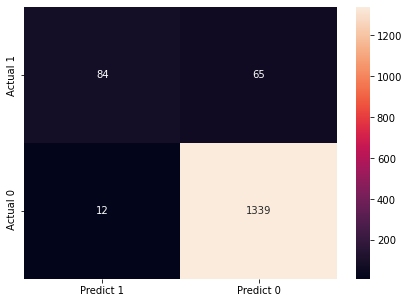

In [43]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1"," Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.show()

#### The confusion matrix

 - __True Positives (TP):__ We correctly predicted that 84 customers accepted personal loan in the previous campaign<br>
 - __True Negatives (TN):__ We correctly predicted that 1339 customers did not accept the personal loan in the previous campaign<br>
 - __False Positives (FP):__ We incorrectly predicted that 12 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - __False Negatives (FN):__ We incorrectly predicted that 65 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

### Observations

 - Using the log transformations of CCAvg and Mortgage, the model accuracy is 94%, Which means we have predicted 94% of the outcomes correctly.<br>
 - The bank is looking at increasing the profits by encouraging the customers to take the loan. <br>
 - In total, we have predicted 77 outcomes incorrectly, which might impact the profit that the bank has targeted.<br>

$R^2$ and adjusted $R^2$ is not the right metric for logistic regression.<br>
Let us find the root mean squared(RMSE) error, mean absolute error(MAE) and MAE of this model.

In [44]:
# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    # predicting using the independent variables
    pred = model.predict(predictors)

    # computing the actual prices by using the exponential function
    target = np.exp(target)
    pred = np.exp(pred)

    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = np.mean(np.abs(target - pred) / target) * 100  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [45]:
# Checking model performance on train set
print("Training Performance:")
log_model_perf_train = model_performance_regression(log_model, x_train, y_train)
log_model_perf_train

Training Performance:


RMSE      MAE     MAPE
0  0.342427  0.06824  3.47245

In [46]:
# Checking model performance on test set
print("Test Performance:")
log_model_perf_test = model_performance_regression(log_model, x_test, y_test)
log_model_perf_test

Test Performance:


RMSE       MAE      MAPE
0  0.389309  0.088205  4.113815

### Observations:
 
 - The RMSE and MAE of train and test data are close.<br>
 - The performance in testing seems to be better than the training set.
 - The mean absolute error indicates that the present model predicts the potential loan customers with an error of 0.09.<br>
 - MAPE indicates that the model can predict ~4% of the loan customers.<br>

### Using Forward Feature selection

Let us use forward feature selection and reduce the independent variables to check if it positively impacts the model performance.

In [47]:
reg = LogisticRegression(solver="liblinear", random_state=1)

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes "Number of features to select"
    floating=False,
    scoring="neg_mean_squared_error",
    verbose=2,
    n_jobs=-1,  # this will ensure all CPU cores are being used for computation
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    1.4s finished

[2022-06-03 22:27:16] Features: 1/53 -- score: -0.09142857142857143[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.1s finished

[2022-06-03 22:27:16] Features: 2/53 -- score: -0.08[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  51 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    0.1s finished

[2022-06-03 22:27:16] Features: 3/53 -- score: -0.07142857142857142[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished

[2022-06-03 2

[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.1s finished

[2022-06-03 22:27:21] Features: 30/53 -- score: -0.03914285714285714[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  23 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.1s finished

[2022-06-03 22:27:21] Features: 31/53 -- score: -0.03914285714285714[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  22 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.0s finished

[2022-06-03 22:27:21] Features: 32/53 -- score: -0.03914285714285714[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Do

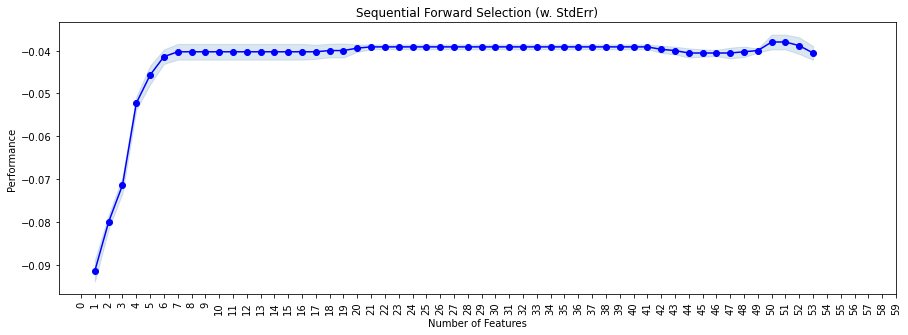

In [408]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(
    np.arange(0, 60, 1), np.arange(0, 60, 1), rotation=90
)  # to make the tick marks readable
plt.show()

 - There is a rise and drop in the performance with the change of number of features.<br>
 - The performance seems to be constant after 7 features.<br>
 - The performance seems to be high at 50.<br>
 - Let us consider model with 7 features.<br>

#### Selecting 7 features

In [409]:
reg = LogisticRegression(solver="liblinear", random_state=1)

# # Build step forward feature selection
sfs = SFS(
    reg,
    k_features=7,
    forward=True,
    floating=False,
    scoring="neg_mean_squared_error",
    verbose=2,
    cv=5,
    n_jobs=-1,
)

# Perform SFFS
sfs_7 = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  53 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    0.0s finished

[2022-06-03 16:16:52] Features: 1/7 -- score: -0.09142857142857143[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.1s finished

[2022-06-03 16:16:52] Features: 2/7 -- score: -0.08[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  51 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    0.1s finished

[2022-06-03 16:16:52] Features: 3/7 -- score: -0.07142857142857142[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parall

In [48]:
# important features
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


In [49]:
x_train.columns[feat_cols]

Index(['ID', 'Age', 'Experience', 'Income', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard', 'CCAvg_log', 'Mortgage_log', 'Family_2',
       'Family_3', 'Family_4', 'Education_2', 'Education_3',
       'County_Butte County', 'County_Contra Costa County',
       'County_El Dorado County', 'County_Fresno County',
       'County_Humboldt County', 'County_Imperial County',
       'County_Kern County', 'County_Lake County', 'County_Los Angeles County',
       'County_Marin County', 'County_Mendocino County',
       'County_Merced County', 'County_Monterey County', 'County_Napa County',
       'County_Orange County', 'County_Placer County',
       'County_Riverside County', 'County_Sacramento County',
       'County_San Benito County', 'County_San Bernardino County',
       'County_San Diego County', 'County_San Francisco County',
       'County_San Joaquin County', 'County_San Luis Obispo County',
       'County_San Mateo County', 'County_Santa Barbara County',
       'Cou

In [50]:
x_train2 = x_train[x_train.columns[feat_cols]]

In [51]:
x_test2 = x_test[x_train2.columns]

In [52]:
# Fitting linear model
log_reg_model2 = LogisticRegression(solver="liblinear", random_state=1)
log_reg_model2.fit(x_train2, y_train)
y_predict2 = log_reg_model2.predict(x_test2)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(log_reg_model2.coef_, log_reg_model2.intercept_.flatten()),
    index=x_train2.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

Coefficients
ID                                -0.000064
Age                               -0.423596
Experience                         0.424665
Income                             0.051089
Securities_Account                -0.305345
CD_Account                         2.290463
Online                            -0.431094
CreditCard                        -0.659351
CCAvg_log                          0.950061
Mortgage_log                       0.030156
Family_2                          -0.414505
Family_3                           1.896292
Family_4                           1.161366
Education_2                        2.811427
Education_3                        3.137363
County_Butte County               -0.042217
County_Contra Costa County         0.038265
County_El Dorado County           -0.071830
County_Fresno County               0.033642
County_Humboldt County            -0.076870
County_Imperial County            -0.002430
County_Kern County                 0.349856
County_Lake County                -0.009176
County_Los Angeles County         -0.134010
County_Marin County                0.089561
County_Mendocino County           -0.029245
County_Merced County              -0.019751
County_Monterey County             0.006915
County_Napa County                -0.003453
County_Orange County              -0.256568
County_Placer County               0.067342
County_Riverside County            0.149981
County_Sacramento County           0.066901
County_San Benito County          -0.035667
County_San Bernardino County      -0.264207
County_San Diego County           -0.008466
County_San Francisco County        0.053325
County_San Joaquin County          0.006610
County_San Luis Obispo County     -0.073916
County_San Mateo County           -0.531597
County_Santa Barbara County        0.039785
County_Santa Clara County          0.103846
County_Santa Cruz County           0.060335
County_Shasta County              -0.028957
County_Siskiyou County            -0.013457
County_Solano County               0.084568
County_Sonoma County               0.177074
County_Stanislaus County          -0.027619
County_Trinity County             -0.017465
County_Tuolumne County            -0.010164
County_Ventura County              0.141792
County_Yolo County                -0.124444
County_missing                     0.050277
Intercept                         -0.407827

In [53]:
model_score2 = log_reg_model2.score(x_test2, y_test)
print(model_score2)

0.9486666666666667


 - The accuracy seems to be the same for both the models.

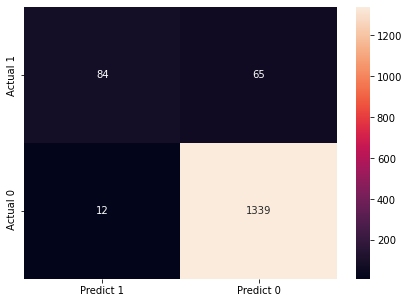

In [54]:
cm=metrics.confusion_matrix(y_test, y_predict2, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1"," Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.show()

#### The confusion matrix

 - __True Positives (TP):__ We correctly predicted that 84 customers accepted personal loan in the previous campaign<br>
 - __True Negatives (TN):__ We correctly predicted that 1339 customers did not accept the personal loan in the previous campaign<br>
 - __False Positives (FP):__ We incorrectly predicted that 12 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - __False Negatives (FN):__ We incorrectly predicted that 65 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

In [55]:
# Checking model performance on train set
print("Training Performance:")
log_model_perf_train2 = model_performance_regression(log_reg_model2, x_train2, y_train)
log_model_perf_train2

Training Performance:


RMSE      MAE     MAPE
0  0.342427  0.06824  3.47245

In [56]:
# Checking model performance on test set
print("Testing Performance:")
log_model_perf_test2 = model_performance_regression(log_reg_model2, x_test2, y_test)
log_model_perf_test2

Testing Performance:


RMSE       MAE      MAPE
0  0.389309  0.088205  4.113815

### Observations:

 - There is no change in the RMSE and MAE.

### Performance Summary of the two models

In [57]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_model_perf_train.T,
        log_model_perf_train2.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression (with sfs)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression  Logistic Regression (with sfs)
RMSE             0.342427                        0.342427
MAE              0.068240                        0.068240
MAPE             3.472450                        3.472450

In [421]:
# test performance comparison

models_test_comp_df = pd.concat(
    [log_model_perf_test.T,
    log_model_perf_test2.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression (with sfs)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Logistic Regression  Logistic Regression (with sfs)
RMSE             0.389309                        0.379062
MAE              0.088205                        0.083623
MAPE             4.113815                        3.365963

### Observations:

 - The RMSE and MAE have reduced slightly in the second model when compared to the first model.<br>
 - There is a change in MAPE as well, which means in the second model, the model can predict within ~3.36% of potential customers who would agree to take out a loan.
 
### We will go with the second model.

## Decision Tree

Let us build a decision tree model for the same dataset. We have already split the data into a 70:30 ratio.

In [59]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

Accuracy score

In [60]:
print("Accuracy on training set : ",dTree.score(x_train, y_train))
print("Accuracy on test set : ",dTree.score(x_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9773333333333334


Accuracy is not the right metric here, as even if we predict all the outcomes as negative we will have an accuracy of 98%. So we will be using precision to evaluate the model performance.<br>

The bank wants to increase the profit by encouraging the customers to take loans. <br>
 - If we predict that the customer will take a loan but the customer is not interested in taking the loan, this will not cause much of an issue.<br>
 - If we predict that the customer will not be taking a loan while they are interested in taking, this would be an opportunity loss.<br>
 
Let us use precision to check for the model performance as we need both positives and negatives to evaluate the performance.

In [61]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(x_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [114]:
##  Function to calculate precision score
def get_precision_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
    print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

### Confusion Matrix

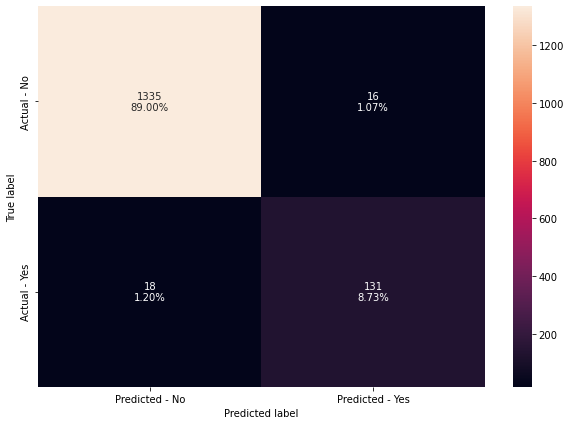

In [115]:
make_confusion_matrix(dTree,y_test)

In [116]:
get_precision_score(dTree)

Precision on training set :  1.0
Precision on test set :  0.891156462585034


### Visualizing the decision tree

In [117]:
feature_names = list(X.columns)
print(feature_names)

['ID', 'Age', 'Experience', 'Income', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'CCAvg_log', 'Mortgage_log', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'County_Butte County', 'County_Contra Costa County', 'County_El Dorado County', 'County_Fresno County', 'County_Humboldt County', 'County_Imperial County', 'County_Kern County', 'County_Lake County', 'County_Los Angeles County', 'County_Marin County', 'County_Mendocino County', 'County_Merced County', 'County_Monterey County', 'County_Napa County', 'County_Orange County', 'County_Placer County', 'County_Riverside County', 'County_Sacramento County', 'County_San Benito County', 'County_San Bernardino County', 'County_San Diego County', 'County_San Francisco County', 'County_San Joaquin County', 'County_San Luis Obispo County', 'County_San Mateo County', 'County_Santa Barbara County', 'County_Santa Clara County', 'County_Santa Cruz County', 'County_Shasta County', 'County_Siskiyou County', 'County_

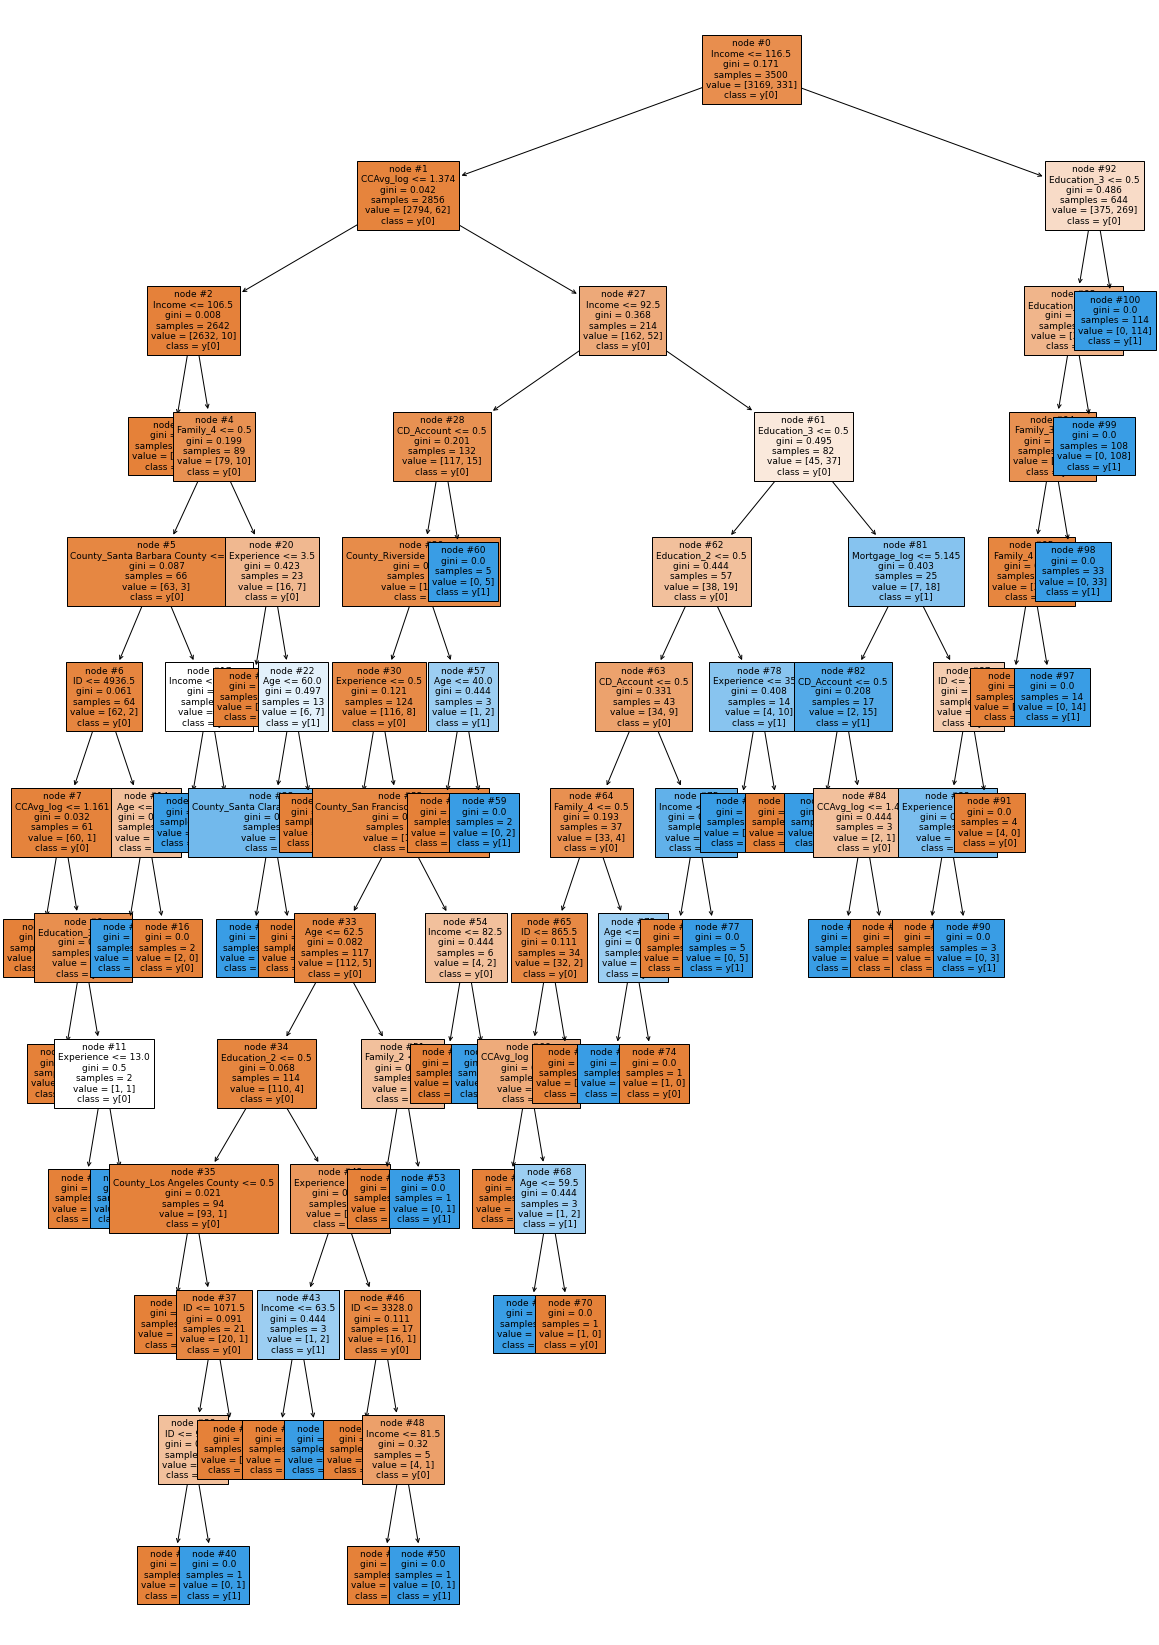

In [118]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [119]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg_log <= 1.37
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- County_Santa Barbara County <= 0.50
|   |   |   |   |   |--- ID <= 4936.50
|   |   |   |   |   |   |--- CCAvg_log <= 1.16
|   |   |   |   |   |   |   |--- weights: [51.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg_log >  1.16
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- Experience <= 13.00
|   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Experience >  13.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- ID >  4936.50
|   |   |   |   |   |   |--- Age <= 33.50
|   |   |   |   |   |   |   |--- weigh

Since the tree has multiple levels it is hard to visualise the entire tree in a single frame. This can even cause overfitting. 

#### Let us check for the important features in the tree using Gini Importance.

In [120]:
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Income                         0.311608
Education_2                    0.236632
Education_3                    0.166724
Family_3                       0.094326
Family_4                       0.052246
CCAvg_log                      0.043080
CD_Account                     0.026348
Experience                     0.025260
Age                            0.015355
ID                             0.009637
County_Santa Clara County      0.005190
Mortgage_log                   0.004672
County_Riverside County        0.003544
Family_2                       0.002224
County_San Francisco County    0.001608
County_Santa Barbara County    0.001422
County_Los Angeles County      0.000123
County_San Joaquin County      0.000000
County_San Luis Obispo County  0.000000
County_San Diego County        0.000000
County_San Mateo County        0.000000
County_Stanislaus County       0.000000
County_Santa Cruz County       0.000000
County_Shasta County           0.000000


Let us visualise this using a graph.

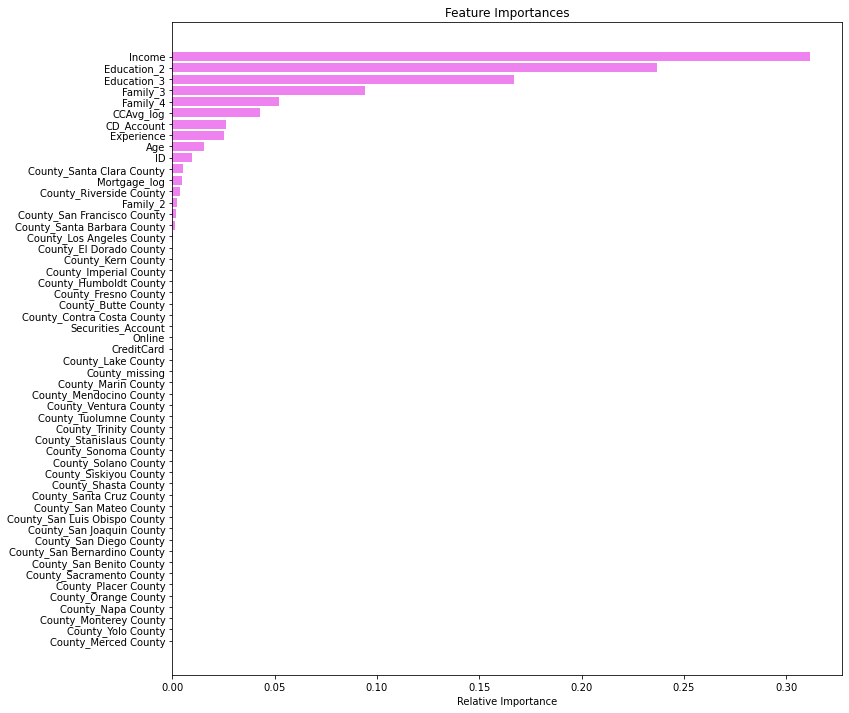

In [121]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observations:
 
 - We can see that only 16 features have an impact on the model performance. <br>
 - Income and Education seems to have higher control over the model.<br>
 - For the rest the gini importance is 0 which means there is no impurity on these nodes.<br>

The tree is really big and complex and is prone to overfitting. Let us apply pruning here.

### Reducing overfitting:

Let us prune the tree upto level 4 to ensure we are not overfitting the tree.

In [122]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=4,random_state=1)
dTree1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

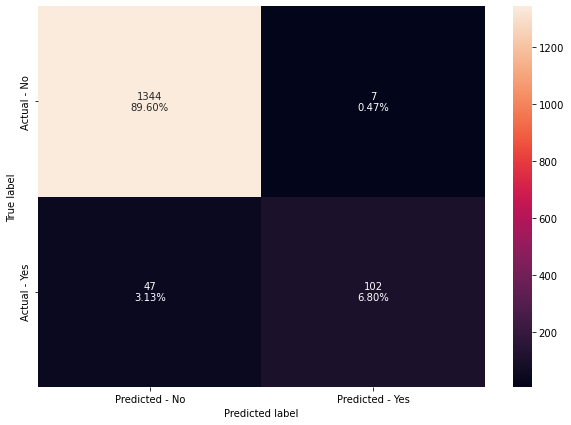

In [123]:
make_confusion_matrix(dTree1, y_test)

In [124]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(x_train, y_train))
print("Accuracy on test set : ",dTree1.score(x_test, y_test))
# Recall on train and test
get_precision_score(dTree1)

Accuracy on training set :  0.9828571428571429
Accuracy on test set :  0.964
Precision on training set :  0.9754385964912281
Precision on test set :  0.9357798165137615


Let us visualize the decision tree

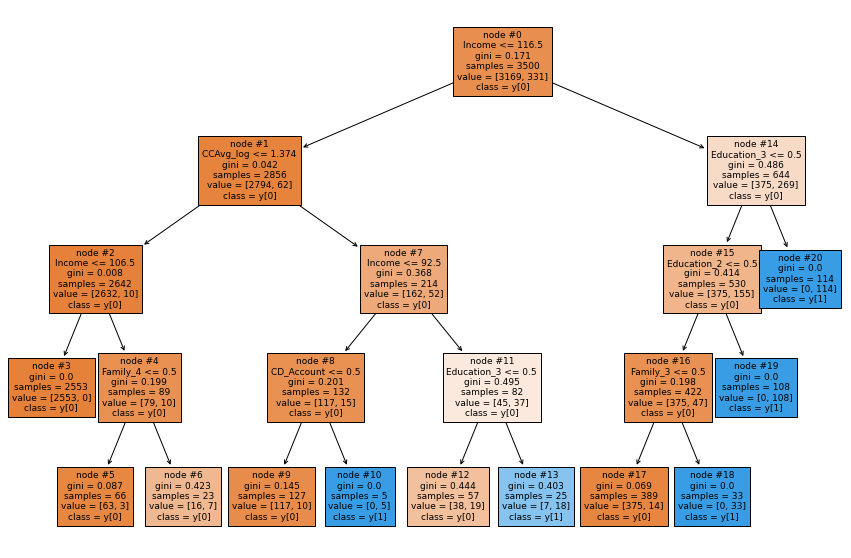

In [125]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [126]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree1,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg_log <= 1.37
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Family_4 >  0.50
|   |   |   |   |--- weights: [16.00, 7.00] class: 0
|   |--- CCAvg_log >  1.37
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education_3 <= 0.50
|   |   |   |   |--- weights: [38.00, 19.00] class: 0
|   |   |   |--- Education_3 >  0.50
|   |   |   |   |--- weights: [7.00, 18.00] class: 1
|--- Income >  116.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- weights: [375.00, 14.00] class: 0
|   |   |   |--- Family_3 >  0.50
|   |   |   | 

### Observations:
 
 - The tree has become readable now and the precision has increased when compared to the initial model. <br>
 - If we make the the depth as 5, again it will be difficult to read the tree but it has a better precision.<br>

We can see that there is a little bit of clutter in the decision tree, but the precision is better than the initial model.

In [127]:
print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Income                         0.354821
Education_2                    0.269946
Education_3                    0.197046
Family_3                       0.112381
CCAvg_log                      0.045031
CD_Account                     0.016231
Family_4                       0.004545
ID                             0.000000
County_San Mateo County        0.000000
County_San Luis Obispo County  0.000000
County_San Francisco County    0.000000
County_San Joaquin County      0.000000
County_Santa Clara County      0.000000
County_San Diego County        0.000000
County_San Bernardino County   0.000000
County_San Benito County       0.000000
County_Sacramento County       0.000000
County_Santa Barbara County    0.000000
County_Solano County           0.000000
County_Santa Cruz County       0.000000
County_Shasta County           0.000000
County_Siskiyou County         0.000000
County_Placer County           0.000000
County_Sonoma County           0.000000


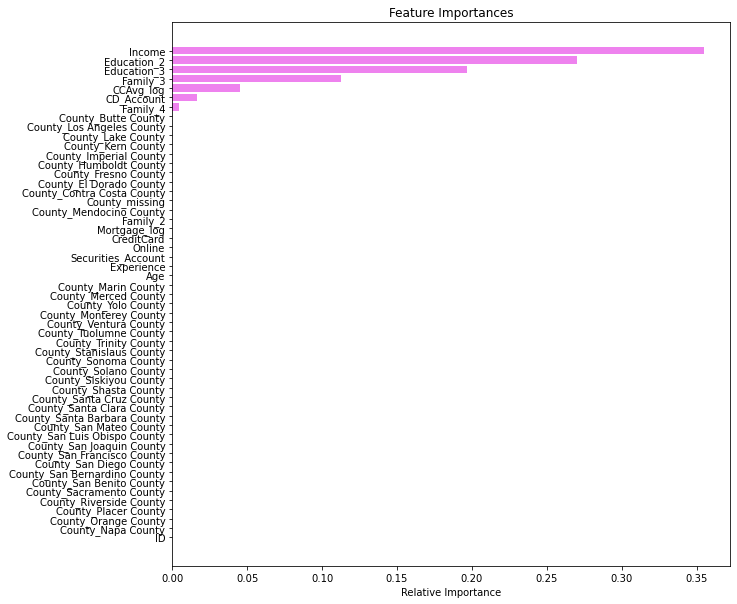

In [128]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [129]:
dTree2 = DecisionTreeClassifier(criterion = 'gini',max_depth=5,random_state=1)
dTree2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

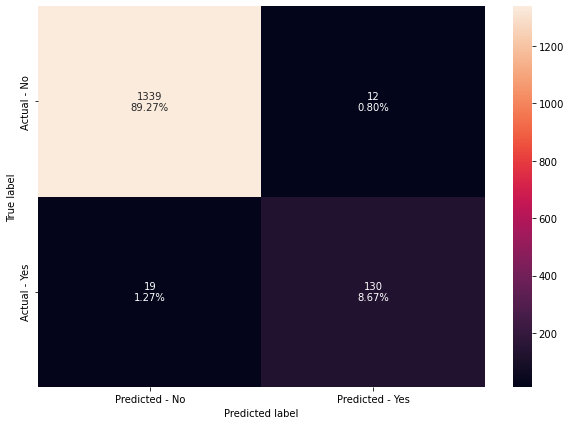

In [130]:
make_confusion_matrix(dTree2, y_test)

In [131]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree2.score(x_train, y_train))
print("Accuracy on test set : ",dTree2.score(x_test, y_test))
# Recall on train and test
get_precision_score(dTree2)

Accuracy on training set :  0.9897142857142858
Accuracy on test set :  0.9793333333333333
Precision on training set :  0.9595015576323987
Precision on test set :  0.9154929577464789


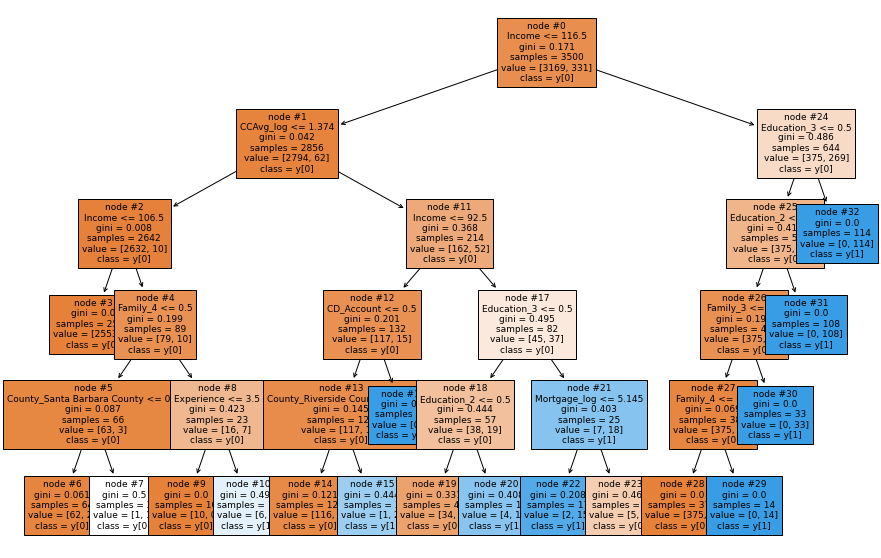

In [132]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree2,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [133]:
print (pd.DataFrame(dTree2.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Income                         0.327822
Education_2                    0.259298
Education_3                    0.182053
Family_3                       0.103830
Family_4                       0.053769
CCAvg_log                      0.041604
CD_Account                     0.014996
Experience                     0.006019
Mortgage_log                   0.005143
County_Riverside County        0.003901
County_Santa Barbara County    0.001565
County_San Mateo County        0.000000
County_San Luis Obispo County  0.000000
County_San Joaquin County      0.000000
ID                             0.000000
County_Santa Clara County      0.000000
County_San Diego County        0.000000
County_San Bernardino County   0.000000
County_San Benito County       0.000000
County_San Francisco County    0.000000
County_Stanislaus County       0.000000
County_Santa Cruz County       0.000000
County_Shasta County           0.000000
County_Siskiyou County         0.000000


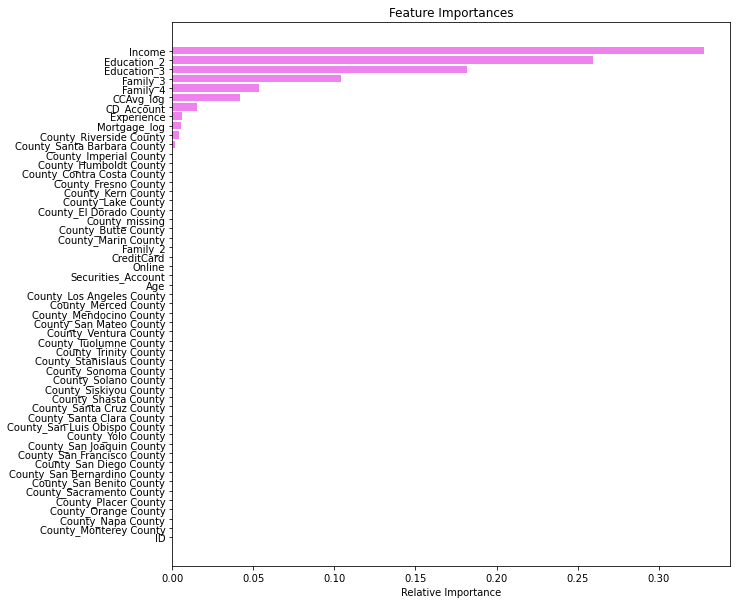

In [134]:
importances = dTree2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observations:

 - We can see that there are changes in the important features in these models.<br>
 - This is a drawback of pre-pruning, as we stop the growth of the tree even before we evaluate relevant features with less gini impurity.<br>
 - Let us try post pruning.<br>

### Using GridSearch for HyperParameter tuning

 - HyperParamaeters cannot be found directly, hence we experiment to find it.<br>
 - We use grid search to find hyperparameters.<br>

In [135]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_samples_leaf=5,
                       random_state=1)

#### Confusion Matrix after tuning

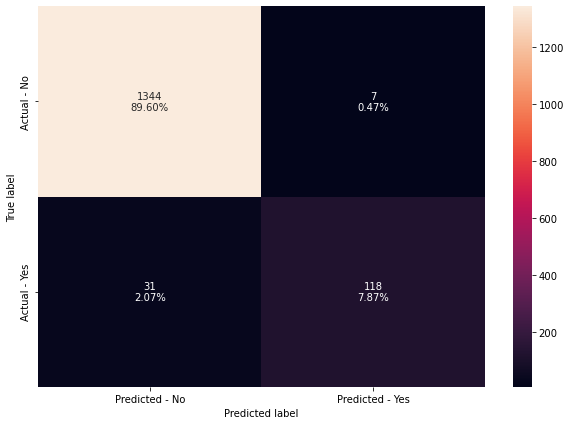

In [136]:
make_confusion_matrix(estimator,y_test)

In [137]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(x_train, y_train))
print("Accuracy on test set : ",estimator.score(x_test, y_test))
# Recall on train and test
get_precision_score(estimator)

Accuracy on training set :  0.9868571428571429
Accuracy on test set :  0.9746666666666667
Precision on training set :  0.9765886287625418
Precision on test set :  0.944


The precision on the test data have increased after using hyperparameters.

### Visualise Tree

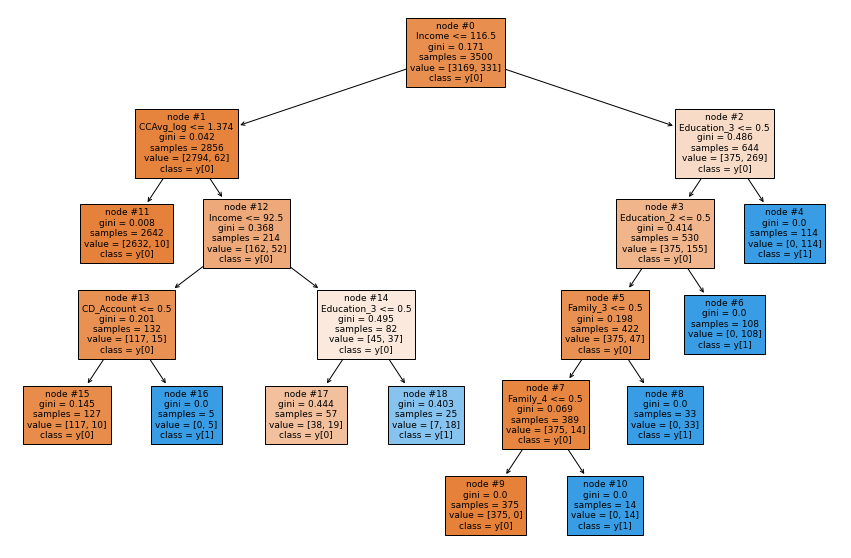

In [138]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [139]:
print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg_log <= 1.37
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg_log >  1.37
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education_3 <= 0.50
|   |   |   |   |--- weights: [38.00, 19.00] class: 0
|   |   |   |--- Education_3 >  0.50
|   |   |   |   |--- weights: [7.00, 18.00] class: 1
|--- Income >  116.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.00, 14.00] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [0.00, 33.00] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [0.

In [140]:
print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Income                         0.335478
Education_2                    0.258373
Education_3                    0.188599
Family_3                       0.107563
Family_4                       0.051352
CCAvg_log                      0.043100
CD_Account                     0.015535
ID                             0.000000
County_San Mateo County        0.000000
County_San Luis Obispo County  0.000000
County_San Francisco County    0.000000
County_San Joaquin County      0.000000
County_Santa Clara County      0.000000
County_San Diego County        0.000000
County_San Bernardino County   0.000000
County_San Benito County       0.000000
County_Sacramento County       0.000000
County_Santa Barbara County    0.000000
County_Solano County           0.000000
County_Santa Cruz County       0.000000
County_Shasta County           0.000000
County_Siskiyou County         0.000000
County_Placer County           0.000000
County_Sonoma County           0.000000


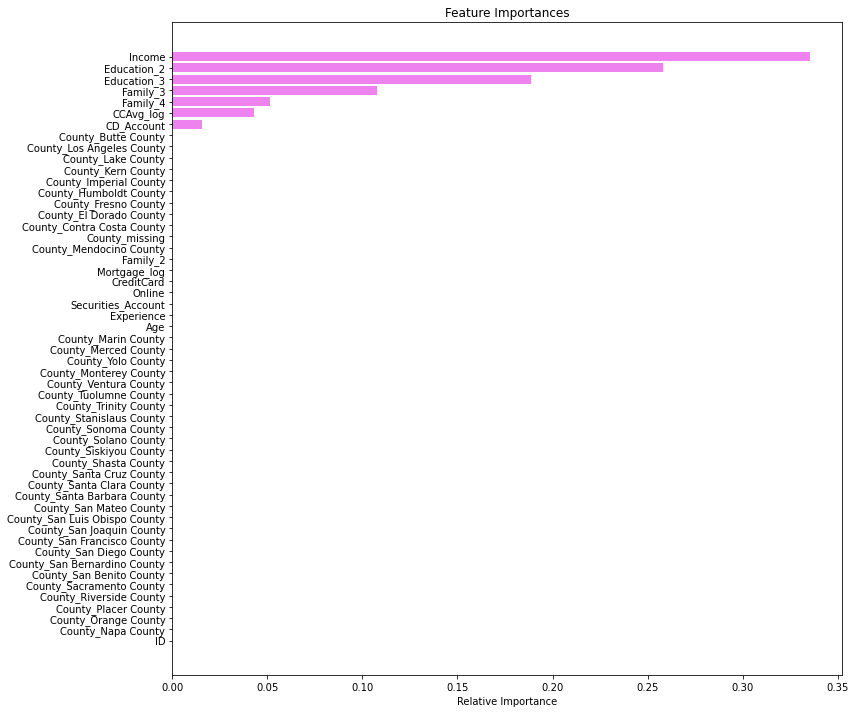

In [141]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Post pruning is a better metric as we might neglect a few hyperparameters which are utilised while post pruning.

### Cost Complexity Pruning

Cost complexity pruning gives multiple parameters like min_sample_leaves and max_depth to avoid overfitting of data. Here we use ccp_alpha on different parameters to decide on which parameters improve model performance. Here we check for the weakest link that is the node with less alpha, and these nodes are pruned.

In [142]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [143]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000187    0.000562
2     0.000188    0.001127
3     0.000269    0.002202
4     0.000269    0.002740
5     0.000326    0.004371
6     0.000359    0.005447
7     0.000381    0.005828
8     0.000381    0.006209
9     0.000381    0.006590
10    0.000429    0.007018
11    0.000476    0.007495
12    0.000514    0.009036
13    0.000582    0.009618
14    0.000607    0.010225
15    0.000627    0.010852
16    0.000643    0.011495
17    0.000800    0.012296
18    0.000811    0.016352
19    0.001552    0.017903
20    0.001552    0.022560
21    0.002333    0.024893
22    0.003294    0.028187
23    0.006473    0.034659
24    0.007712    0.042372
25    0.016154    0.058525
26    0.032821    0.124167
27    0.047088    0.171255

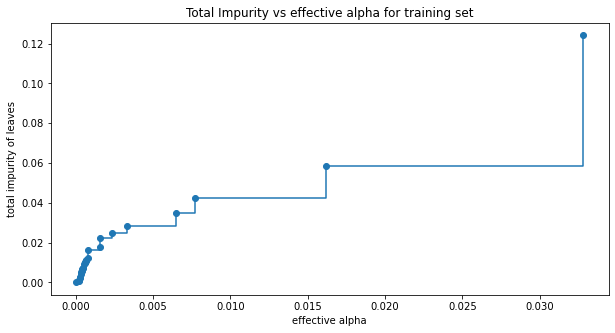

In [144]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Let us now train the model using effective alpha. this will leave a single node at the end.

In [145]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596768


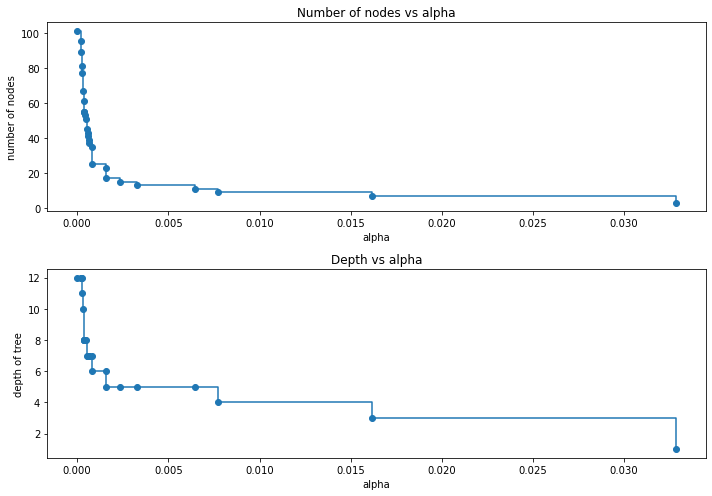

In [146]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Comparing Accuracy and Alpha in train and test

In [147]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

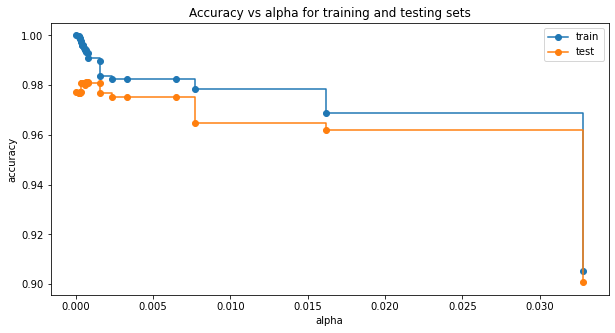

In [148]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [149]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(x_train, y_train))
print('Test accuracy of best model: ',best_model.score(x_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0006274509803921567, random_state=1)
Training accuracy of best model:  0.994
Test accuracy of best model:  0.9813333333333333


#### Since Accuracy cannot be a right metrix here, let us use recall and compare

In [150]:
precision_train=[]
for clf in clfs:
    pred_train3=clf.predict(x_train)
    values_train=metrics.precision_score(y_train,pred_train3)
    precision_train.append(values_train)

In [151]:
precision_test=[]
for clf in clfs:
    pred_test3=clf.predict(x_test)
    values_test=metrics.precision_score(y_test,pred_test3)
    precision_test.append(values_test)

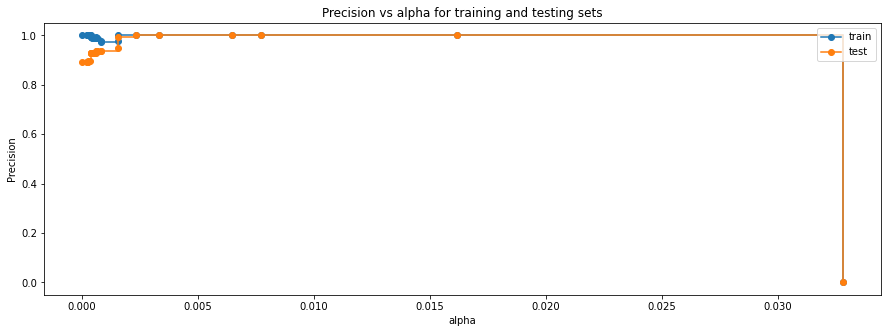

In [152]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Precision")
ax.set_title("Precision vs alpha for training and testing sets")
ax.plot(ccp_alphas, precision_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, precision_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [153]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(precision_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.002333060640147255, random_state=1)


### Confusion Matrix of Post pruned decision tree

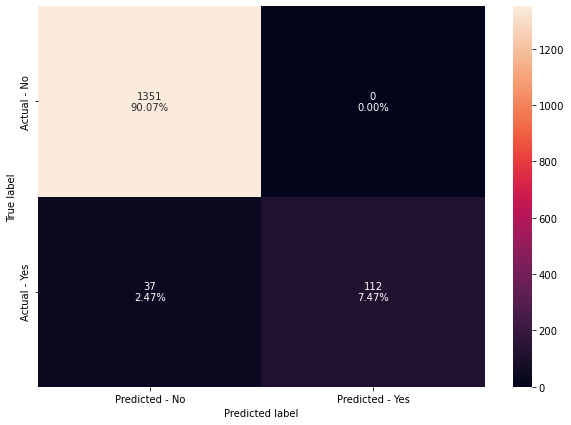

In [154]:
make_confusion_matrix(best_model,y_test)

In [155]:
# Precision on train and test
get_recall_score(best_model)

Recall on training set :  0.8126888217522659
Recall on test set :  0.7516778523489933


### Visualising the decision tree

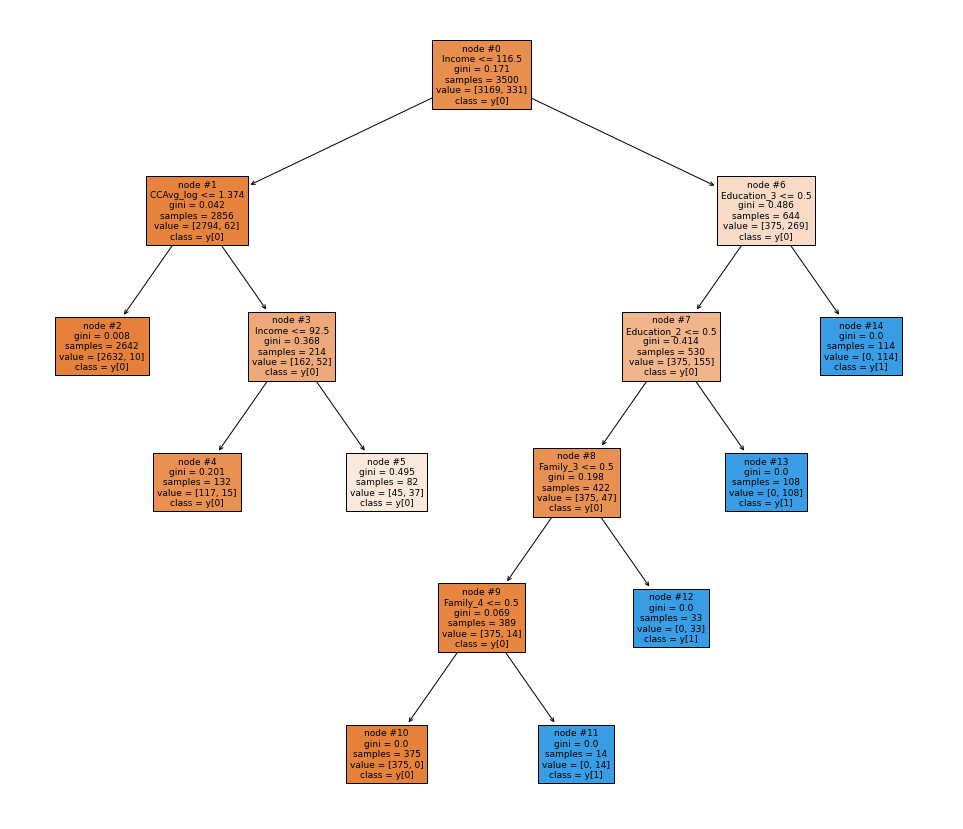

In [156]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [157]:
print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg_log <= 1.37
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg_log >  1.37
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- weights: [45.00, 37.00] class: 0
|--- Income >  116.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.00, 14.00] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [0.00, 33.00] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [0.00, 108.00] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [0.00, 114.00] class: 1



In [158]:
print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Income                         0.344228
Education_2                    0.265112
Education_3                    0.183374
Family_3                       0.110369
Family_4                       0.052692
CCAvg_log                      0.044225
County_San Diego County        0.000000
County_San Francisco County    0.000000
County_Santa Cruz County       0.000000
County_San Joaquin County      0.000000
County_San Luis Obispo County  0.000000
County_San Bernardino County   0.000000
County_San Benito County       0.000000
County_Sacramento County       0.000000
County_San Mateo County        0.000000
County_Santa Barbara County    0.000000
County_Santa Clara County      0.000000
ID                             0.000000
County_Shasta County           0.000000
County_Siskiyou County         0.000000
County_Placer County           0.000000
County_Solano County           0.000000
County_Sonoma County           0.000000
County_Stanislaus County       0.000000


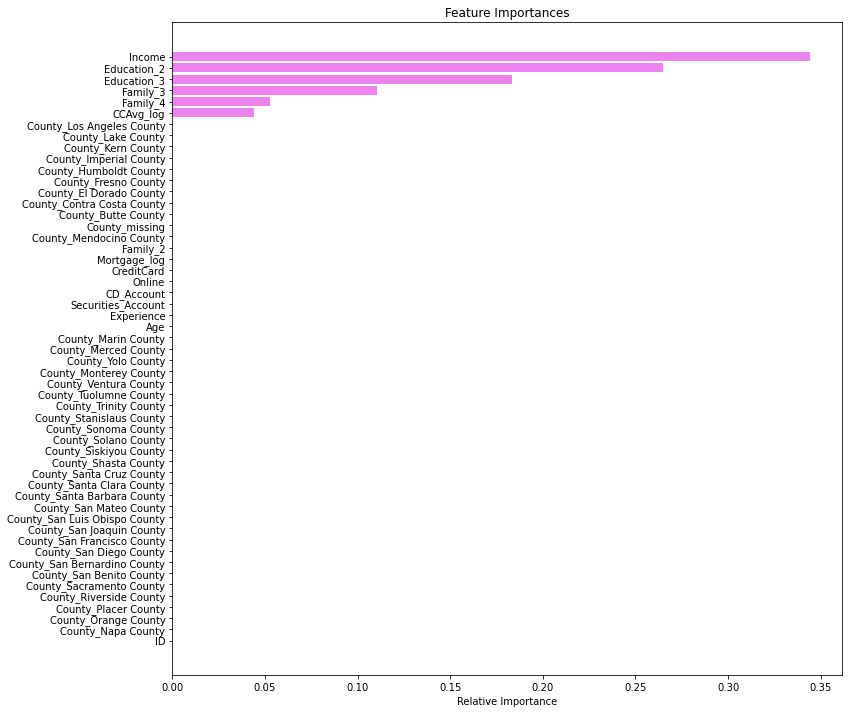

In [159]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Comparing decision tree models

In [162]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with restricted maximum depth to 4',
                                          'Decision tree with restricted maximum depth to 5','Decision tree with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Precision':[1,0.97,0.96,0.98,0.81], 'Test_Precision':[0.89,0.93,0.91,0.94,0.75]}) 
comparison_frame

Model  Train_Precision  \
0                       Initial decision tree model             1.00   
1  Decision tree with restricted maximum depth to 4             0.97   
2  Decision tree with restricted maximum depth to 5             0.96   
3          Decision tree with hyperparameter tuning             0.98   
4                   Decision tree with post-pruning             0.81   

   Test_Precision  
0            0.89  
1            0.93  
2            0.91  
3            0.94  
4            0.75

### Observations:

 - Decision tree after hyper parameter tuning seems to have higher precision compared to all the other models.
 - The initial model has multiple levels which makes it hard to read the tree and it also overfits the data.
 - Hence we perform pruning.
 - In pre pruning we have good performance, but there are chances of missing out critical parameters as we specify a level and the tree stops growing at that level.
 - The tree with hyperparameters becomes readable and also eliminates overfitting. Hence we consider that model.
 
#### We will consider a model with hyperparameter tuning.

## Observations:

 - Both logistic regression and decision tree use almost same parameters in the model.<br>
 - Most commonly used parameters are Income, Family and Education.<br>
 - CCAvg is also one of the parameters considered in decision tree while location Los Angeles is considered in logistic regression.<br>
 - CCAvg is mostly directly proportional to income and Mortgage.<br>
 - Family of 3-4 is the parameter considered in the family.<br>
 - The customers considered are mostly educated.<br>

### Logistic Regression:<br>

 - We will be considering the model with feature forwarding as it has less RMSE and MAE.<br>
 - In logistic regression, we mainly consider accuracy as the scoring parameter.<br>
 - Our model is able to predict the dataset with 95% accuracy.<br>
 
### Decision Tree:<br>
  - In the decision tree, we will be considering the model with hyperparameter tuning as it is not a overfit model and the tree contains chosen hyperparameters.<br>
  - Since accuracy is not the right measure, we will be using precision to measure the performance of the model.
  - The precision of the model chosen is 0.94.<br>

## Recommendations:

 - Since we are giving out home loans, mostly customers having a family will look into taking up loans.<br>
 - We can campaign on having lower interest on the loans, which can be an encouraging factor for the customers to take loan.<br>
 - Since Income and Education are also factors impacting the decision, awareness can be created.<br>
 - Most of the customers are from Los Angeles, more campaigning can be done in other regions to create bank accounts in the bank while encouraging the existing customers in taking up loans.<br>